# INSE 6630 Recent Developments in Information Systems Security - Group Project

---
Group Members:
- Rakshith Raj Gurupura Puttaraju  - 40235325
- Rahul Ravi Hulli - 40234542
- Mustafa Talha Ucar  - 40059335
- Anita Francis Archibong - 27729790
- Josephine Famiyeh - 40262544
---

This notebook is created for a team project in the INSE 6630 Recent Developments in Information Systems Security course at Concordia University, Montreal, Canada, in the fall semester of 2023. The purpose of the project is to analyze and compare a variety of machine learning techniques for their capability in detecting network intrusions, employing the KDD Cup'99 dataset for this analysis.

---

This notebook focuses on implementing classification using the Support Vector machine algorithm

In [ ]:
# Importing libraries for data analysis and visualization
import numpy as np               # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import pandas as pd              # Pandas for data manipulation
import seaborn as sns            # Seaborn for statistical data visualization

## Loading the Dataset

Preprocessing and dataset splitting have previously been performed in a separate notebook.


In [ ]:
# Mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading training and testing datasets

# Load training data
X_train = pd.read_csv("drive/MyDrive/Data/kdd99_training_data.csv")

# Load testing data
X_test = pd.read_csv("drive/MyDrive/Data/kdd99_testing_data.csv")

# Load training labels
y_train = pd.read_csv("drive/MyDrive/Data/kdd99_training_labels.csv")

# Load testing labels
y_test = pd.read_csv("drive/MyDrive/Data/kdd99_testing_labels.csv")

# Print shape information and label details for training and testing datasets
print(f"Shape of training dataset: {X_train.shape}")  # Display the shape of the training features dataset

print(f"Shape of testing dataset: {X_test.shape}")    # Display the shape of the testing features dataset

print(f"Labels for training dataset: {y_train.shape}") # Display the shape of the training labels

print(f"Labels for testing dataset: {y_test.shape}")   # Display the shape of the testing labels


Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)
Labels for training dataset: (370515, 1)
Labels for testing dataset: (123505, 1)


In [ ]:
# Extracting the 'label' column from the training (y_train)
y_train = y_train['label']
# And testing (y_test) datasets
y_test = y_test['label']

In [ ]:
# Print the unique labels in the training data
print(f"Labels: {y_train.unique()}")

Labels: ['normal' 'dos' 'r2l' 'probe' 'u2r']


## Scaling

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler # Imports the MinMaxScaler from scikit-learn's preprocessing module

scaler = MinMaxScaler() # Create an instance of the MinMaxScaler
X_train = scaler.fit_transform(X_train) # Use the fit_transform method to scale the features of the training set (X_train)
X_test = scaler.transform(X_test) # Use the transform method to apply the same scaling to the test set (X_test)

## Model the Traning

In [ ]:
# training
from sklearn.svm import SVC # Import the Support Vector Classification model from scikit-learn's svm module

model = SVC() # Create an instance of the Support Vector Classification model
model.fit(X_train, y_train)

SVC()

In [ ]:
print(f"Score for Training: {model.score(X_train, y_train)}") # Print the training score of the model using the training data
print(f"Score for Testing: {model.score(X_test, y_test)}") # Print the testing score of the model using the test data

Score for Training: 0.9988475500317127
Score for Testing: 0.9987045058904498


In [ ]:
y_predicted = model.predict(X_test) # Predict the labels for the test set using the trained model

## Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report # Import necessary metrics from scikit-learn

conf_matrix = confusion_matrix(y_test, y_predicted) # Compute the confusion matrix using the actual and predicted labels for the test set
report = classification_report(y_test, y_predicted) # Generate a classification report, including precision, recall, and F1-score

print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.96      0.98      1056
         r2l       0.92      0.83      0.87       279
         u2r       0.82      0.75      0.78        12

    accuracy                           1.00    123505
   macro avg       0.95      0.91      0.93    123505
weighted avg       1.00      1.00      1.00    123505



In [ ]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r'] # Define the class labels for better interpretation
labels = [] # Initialize an empty list to store formatted confusion matrix labels
for i in range(5): # Loop through each combination of actual and predicted classes
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}")) # Append a formatted string to the labels list

labels = np.asarray(labels).reshape(5, 5) # Convert the list of labels to a NumPy array and reshape it to a 5x5 matrix

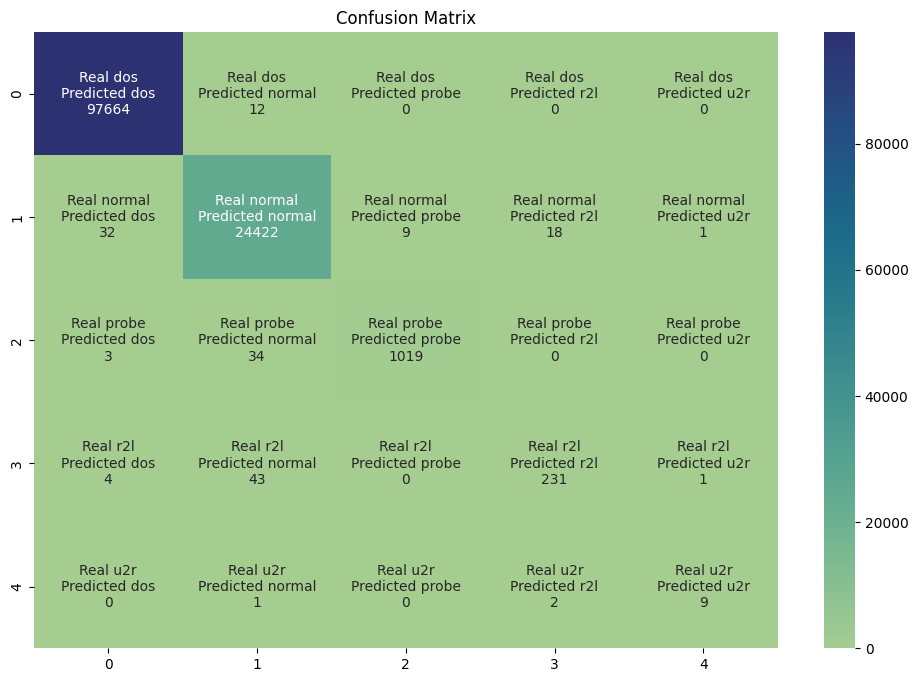

In [ ]:
# visualization of confusion matrix

plt.figure(figsize=(12, 8)) # Set the size of the figure
plt.title("Confusion Matrix") # Set the title of the plot
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='') # Create a heatmap of the confusion matrix with annotations using labels
plt.show() # Display the plot

**Reminder on label proportions:**

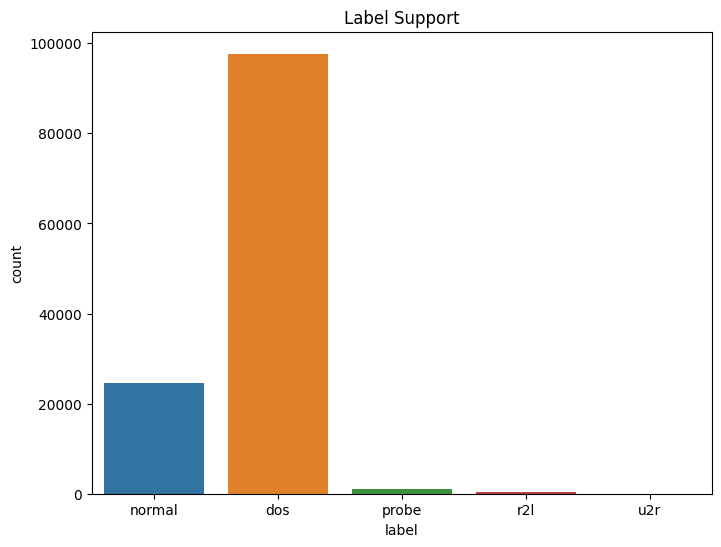

dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64


In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_test = pd.Series(y_test).astype(str) # Convert y_test to a pandas Series and ensure its values are treated as strings

plt.figure(figsize=(8,6)) # Set the size of the figure
plt.title("Label Support") # Set the title of the plot
sns.countplot(x=y_test, ) # Create a countplot to visualize the distribution of labels in y_test
plt.show() # Display the plot

# Calculate and print the proportions of each label in y_test
label_proportions = y_test.value_counts(normalize=True)
print(label_proportions)

## Conclusion

The model achieved remarkable overall prediction results, with the following key metrics:

- **Accuracy:** 1.00
- **Precision (Weighted Avg):** 1.00
- **Recall (Weighted Avg):** 1.00
- **F1-score (Weighted Avg):** 1.00

Notably, the model demonstrated exceptional recall for the 'R2L' category at 98%. However, its performance in the 'U2R' category showed lower recall at 58%.
